In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Supervised\CLIMATE_scaled_sup.csv")
answers = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

In [3]:
# Drop unwanted columns
weather = weather.drop(columns=["DATE","MONTH"])
answers = answers.drop(columns=["DATE"])

In [4]:
X = weather
y = answers

In [5]:
y = y.loc[X.index]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1064, 169)
(457, 169)
(1064, 15)
(457, 15)


In [10]:
k_range = np.arange(1,26)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []

for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

C:\Users\user\anaconda3\envs\quandl-env\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


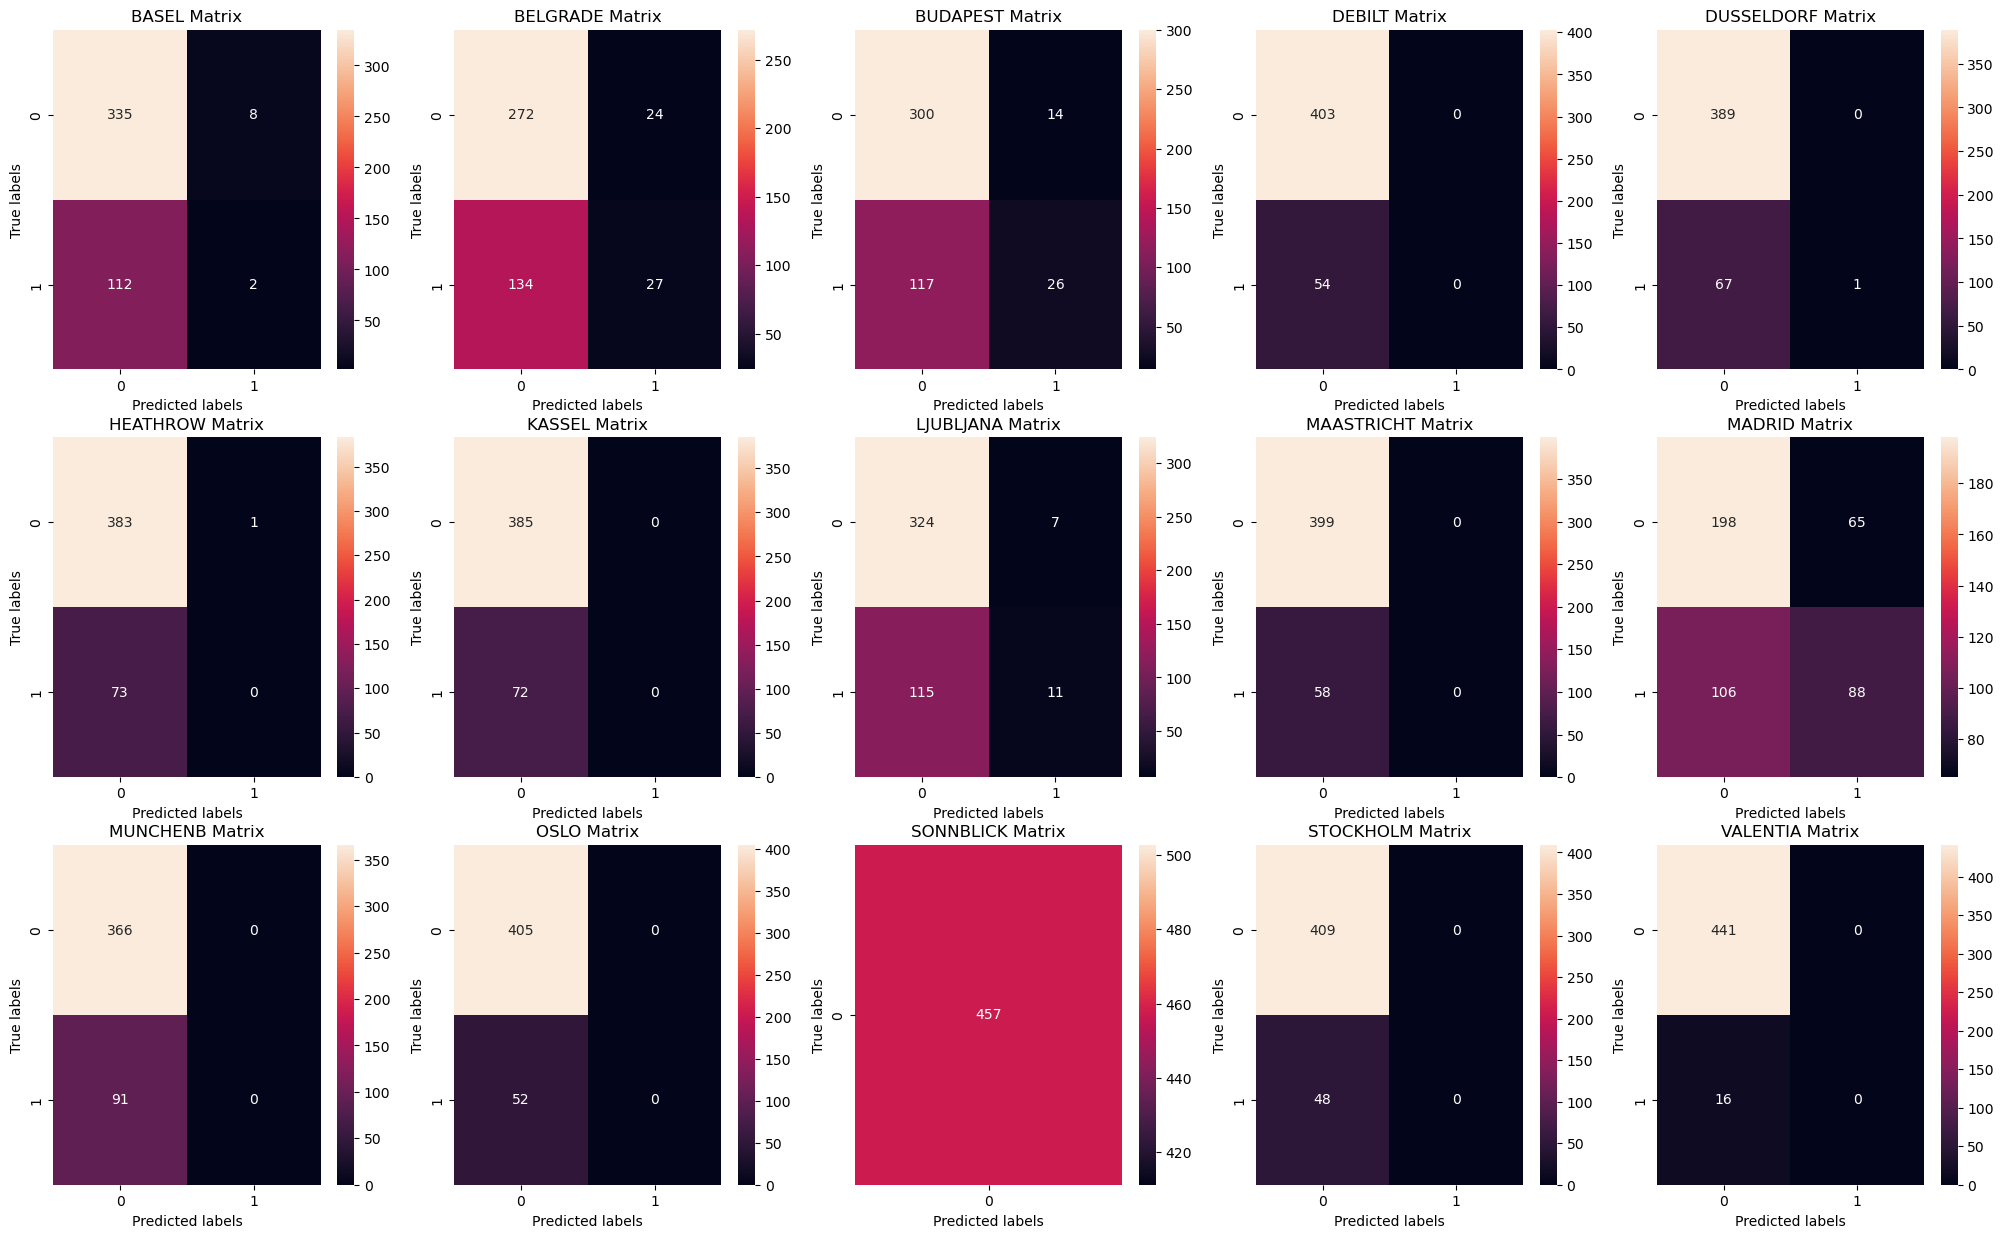

In [15]:
locations = list({x.split("_")[0] for x in weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"

# Build list of valid locations from y_test columns
valid_locations = [col.replace(key, '') for col in y_test.columns if col != 'DATE']

# Filter your original locations list
locations = [loc for loc in locations if loc in valid_locations]
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1